## week2 授業課題2 富士山下山問題

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
# printの表示設定　set_printoptions()
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
# help(np.loadtxt)
# delimiter=区切り文字 skiprows=skip行
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [5]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [6]:
print(fuji)
print(fuji.shape)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]
(300, 5)


## 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

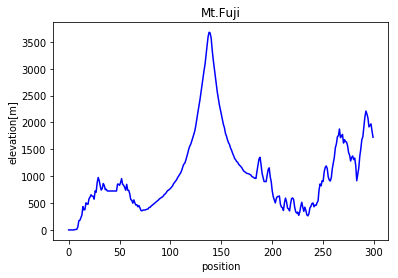

In [7]:
h = fuji[:,3]

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],h,color = "b")
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。<br>
しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。<br>
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。<br>
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [8]:
x = fuji[:,0]
print(x.shape)
print(x)
print(x[-1],x[-2])

(300,)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.

## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。<br>
数式で表すと 「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」 となります。<br>
「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。<br>
 αは0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。<br>
 この値によって下り方が変わります。ここでは例えば0.2に設定してください。

In [35]:
# 問2、問３
def oriru(i,alpha=0.2):
    # Falseの時だけassert
    assert i >=1,"can not calcuration"

    koubai = (h[i] - h[i - 1])/(x[i] - x[i - 1])
    # roundは端数が0.5だと結果が偶数の方へ丸める（銀行丸め）
    # decimalを使うと正確な四捨五入ができる
    tugi = np.round(x[i] - alpha*koubai)
    
    return i, koubai, tugi
    
start = random.randint(200,250)
#start = 0
print(oriru(start))

(250, -14.349999999999909, 253.0)


## 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。<br>
移動毎の地点はリストなどに記録して、これを関数の返り値としてください。<br>
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。<br>
- 《実装上の注意》
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。<br>
移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [57]:
def gezan(i, list_nextpoint, alpha=0.2):

    koubai = (h[i] - h[i - 1])/(x[i] - x[i - 1])
    
    tugi = np.round(x[i] - alpha*koubai)
    # 次の地点がマイナスなこともあるので、1より小さい場合は1とする
    if int(tugi) < 1 :
        tugi = 1
    # 同様にmaxも設定
    if int(tugi) > 299:
        tugi = 299
    
    print("今の地点番号：{}  今の標高：{}  次の地点番号:{}  次の標高:{}".format(i, fuji[i][3], tugi,fuji[int(tugi)][3]))
    #list_nextpoint.append([i, fuji[i][3], int(tugi), fuji[int(tugi)][3] ])
    list_nextpoint.append(int(tugi))
    
    return list_nextpoint
    
#start = random.randint(200,250)

#print(136,oriru(start))



In [58]:
start = 136
list_nextpoint = [start]
while True:
    list_nextpoint = gezan(start, list_nextpoint)
    # すでに通った地点が次の地点番号の場合も無限ループするので下山とみなす
    if list_nextpoint[-1] in list_nextpoint[:-1]:
        print("おめでとうございます！下山完了です")
        break
    else:
        start = list_nextpoint[-1]

今の地点番号：136  今の標高：3434.59  次の地点番号:102.0  次の標高:817.62
今の地点番号：102  今の標高：817.62  次の地点番号:98.0  次の標高:741.17
今の地点番号：98  今の標高：741.17  次の地点番号:95.0  次の標高:672.36
今の地点番号：95  今の標高：672.36  次の地点番号:93.0  次の標高:631.71
今の地点番号：93  今の標高：631.71  次の地点番号:89.0  次の標高:575.07
今の地点番号：89  今の標高：575.07  次の地点番号:85.0  次の標高:505.1
今の地点番号：85  今の標高：505.1  次の地点番号:82.0  次の標高:458.66
今の地点番号：82  今の標高：458.66  次の地点番号:79.0  次の標高:418.41
今の地点番号：79  今の標高：418.41  次の地点番号:73.0  次の標高:368.91
今の地点番号：73  今の標高：368.91  次の地点番号:70.0  次の標高:412.27
今の地点番号：70  今の標高：412.27  次の地点番号:78.0  次の標高:390.14
今の地点番号：78  今の標高：390.14  次の地点番号:77.0  次の標高:386.64
今の地点番号：77  今の標高：386.64  次の地点番号:75.0  次の標高:371.19
今の地点番号：75  今の標高：371.19  次の地点番号:75.0  次の標高:371.19
おめでとうございます！下山完了です


## 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

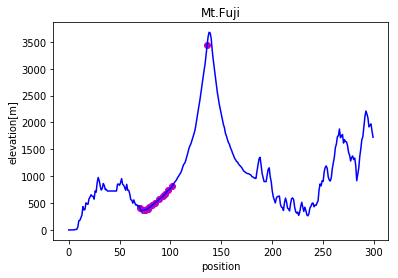

In [59]:
# 標高番号のリストで標高を取り出す
list_next_h = h[list_nextpoint]
plt.plot(fuji[:,0],h,color = "b")
# x=今の地点番号 y=今の標高
plt.scatter(list_nextpoint, list_next_h,color="m")
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()

## 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

In [60]:
# 処理が重いのでプログレスバーを表示する
from ipywidgets import FloatProgress
from IPython.display import display
from time import sleep
fp = FloatProgress(min=1, max=299)
display(fp)

list_all = []

for i in range(1, 300):
    sleep(0.1)
    fp.value = i
    list_nextpoint = [i]
    start = i
    while True:
        list_nextpoint = gezan(start, list_nextpoint)
        # すでに通った地点が次の地点番号の場合も無限ループするので下山とみなす
        if list_nextpoint[-1] in list_nextpoint[:-1]:
            print("おめでとうございます！下山完了です")
            print()
            break
        else:
            start = list_nextpoint[-1]
    list_all.append(list_nextpoint)


FloatProgress(value=1.0, max=299.0, min=1.0)

今の地点番号：1  今の標高：0.0  次の地点番号:1.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：2  今の標高：0.0  次の地点番号:2.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：3  今の標高：0.0  次の地点番号:3.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：4  今の標高：0.0  次の地点番号:4.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：5  今の標高：0.0  次の地点番号:5.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：6  今の標高：6.62  次の地点番号:5.0  次の標高:0.0
今の地点番号：5  今の標高：0.0  次の地点番号:5.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：7  今の標高：7.21  次の地点番号:7.0  次の標高:7.21
おめでとうございます！下山完了です

今の地点番号：8  今の標高：12.2  次の地点番号:7.0  次の標高:7.21
今の地点番号：7  今の標高：7.21  次の地点番号:7.0  次の標高:7.21
おめでとうございます！下山完了です

今の地点番号：9  今の標高：54.41  次の地点番号:1.0  次の標高:0.0
今の地点番号：1  今の標高：0.0  次の地点番号:1.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：10  今の標高：171.56  次の地点番号:1  次の標高:0.0
今の地点番号：1  今の標高：0.0  次の地点番号:1.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：11  今の標高：177.84  次の地点番号:10.0  次の標高:171.56
今の地点番号：10  今の標高：171.56  次の地点番号:1  次の標高:0.0
今の地点番号：1  今の標高：0.0  次の地点番号:1.0  次の標高:0.0
おめでとうございます！下山完了です

今の地点番号：12  今の標高：228.21  次の地点番号:2.0  次の標高:0.0
今の地点番号：2  今の標高：0.0  次の地点番号:2

今の地点番号：61  今の標高：564.02  次の地点番号:83.0  次の標高:471.82
今の地点番号：83  今の標高：471.82  次の地点番号:80.0  次の標高:420.6
今の地点番号：80  今の標高：420.6  次の地点番号:80.0  次の標高:420.6
おめでとうございます！下山完了です

今の地点番号：62  今の標高：552.23  次の地点番号:64.0  次の標高:558.28
今の地点番号：64  今の標高：558.28  次の地点番号:52.0  次の標高:955.14
今の地点番号：52  今の標高：955.14  次の地点番号:37.0  次の標高:756.11
今の地点番号：37  今の標高：756.11  次の地点番号:35.0  次の標高:826.52
今の地点番号：35  今の標高：826.52  次の地点番号:43.0  次の標高:724.5
今の地点番号：43  今の標高：724.5  次の地点番号:43.0  次の標高:724.5
おめでとうございます！下山完了です

今の地点番号：63  今の標高：497.41  次の地点番号:74.0  次の標高:371.04
今の地点番号：74  今の標高：371.04  次の地点番号:74.0  次の標高:371.04
おめでとうございます！下山完了です

今の地点番号：64  今の標高：558.28  次の地点番号:52.0  次の標高:955.14
今の地点番号：52  今の標高：955.14  次の地点番号:37.0  次の標高:756.11
今の地点番号：37  今の標高：756.11  次の地点番号:35.0  次の標高:826.52
今の地点番号：35  今の標高：826.52  次の地点番号:43.0  次の標高:724.5
今の地点番号：43  今の標高：724.5  次の地点番号:43.0  次の標高:724.5
おめでとうございます！下山完了です

今の地点番号：65  今の標高：503.02  次の地点番号:76.0  次の標高:377.62
今の地点番号：76  今の標高：377.62  次の地点番号:75.0  次の標高:371.19
今の地点番号：75  今の標高：371.19  次の地点番号:75.0  次の標高:371.19
おめ

今の地点番号：95  今の標高：672.36  次の地点番号:93.0  次の標高:631.71
今の地点番号：93  今の標高：631.71  次の地点番号:89.0  次の標高:575.07
今の地点番号：89  今の標高：575.07  次の地点番号:85.0  次の標高:505.1
今の地点番号：85  今の標高：505.1  次の地点番号:82.0  次の標高:458.66
今の地点番号：82  今の標高：458.66  次の地点番号:79.0  次の標高:418.41
今の地点番号：79  今の標高：418.41  次の地点番号:73.0  次の標高:368.91
今の地点番号：73  今の標高：368.91  次の地点番号:70.0  次の標高:412.27
今の地点番号：70  今の標高：412.27  次の地点番号:78.0  次の標高:390.14
今の地点番号：78  今の標高：390.14  次の地点番号:77.0  次の標高:386.64
今の地点番号：77  今の標高：386.64  次の地点番号:75.0  次の標高:371.19
今の地点番号：75  今の標高：371.19  次の地点番号:75.0  次の標高:371.19
おめでとうございます！下山完了です

今の地点番号：96  今の標高：700.15  次の地点番号:90.0  次の標高:588.99
今の地点番号：90  今の標高：588.99  次の地点番号:87.0  次の標高:536.54
今の地点番号：87  今の標高：536.54  次の地点番号:84.0  次の標高:488.4
今の地点番号：84  今の標高：488.4  次の地点番号:81.0  次の標高:443.0
今の地点番号：81  今の標高：443.0  次の地点番号:77.0  次の標高:386.64
今の地点番号：77  今の標高：386.64  次の地点番号:75.0  次の標高:371.19
今の地点番号：75  今の標高：371.19  次の地点番号:75.0  次の標高:371.19
おめでとうございます！下山完了です

今の地点番号：97  今の標高：725.72  次の地点番号:92.0  次の標高:613.04
今の地点番号：92  今の標高：613.04  次の地点番号:90.0  

今の地点番号：111  今の標高：1105.8  次の地点番号:102.0  次の標高:817.62
今の地点番号：102  今の標高：817.62  次の地点番号:98.0  次の標高:741.17
今の地点番号：98  今の標高：741.17  次の地点番号:95.0  次の標高:672.36
今の地点番号：95  今の標高：672.36  次の地点番号:93.0  次の標高:631.71
今の地点番号：93  今の標高：631.71  次の地点番号:89.0  次の標高:575.07
今の地点番号：89  今の標高：575.07  次の地点番号:85.0  次の標高:505.1
今の地点番号：85  今の標高：505.1  次の地点番号:82.0  次の標高:458.66
今の地点番号：82  今の標高：458.66  次の地点番号:79.0  次の標高:418.41
今の地点番号：79  今の標高：418.41  次の地点番号:73.0  次の標高:368.91
今の地点番号：73  今の標高：368.91  次の地点番号:70.0  次の標高:412.27
今の地点番号：70  今の標高：412.27  次の地点番号:78.0  次の標高:390.14
今の地点番号：78  今の標高：390.14  次の地点番号:77.0  次の標高:386.64
今の地点番号：77  今の標高：386.64  次の地点番号:75.0  次の標高:371.19
今の地点番号：75  今の標高：371.19  次の地点番号:75.0  次の標高:371.19
おめでとうございます！下山完了です

今の地点番号：112  今の標高：1166.58  次の地点番号:100.0  次の標高:772.58
今の地点番号：100  今の標高：772.58  次の地点番号:96.0  次の標高:700.15
今の地点番号：96  今の標高：700.15  次の地点番号:90.0  次の標高:588.99
今の地点番号：90  今の標高：588.99  次の地点番号:87.0  次の標高:536.54
今の地点番号：87  今の標高：536.54  次の地点番号:84.0  次の標高:488.4
今の地点番号：84  今の標高：488.4  次の地点番号:81.0  次の標高:443.0

今の地点番号：125  今の標高：1953.48  次の地点番号:104.0  次の標高:883.89
今の地点番号：104  今の標高：883.89  次の地点番号:99.0  次の標高:753.68
今の地点番号：99  今の標高：753.68  次の地点番号:96.0  次の標高:700.15
今の地点番号：96  今の標高：700.15  次の地点番号:90.0  次の標高:588.99
今の地点番号：90  今の標高：588.99  次の地点番号:87.0  次の標高:536.54
今の地点番号：87  今の標高：536.54  次の地点番号:84.0  次の標高:488.4
今の地点番号：84  今の標高：488.4  次の地点番号:81.0  次の標高:443.0
今の地点番号：81  今の標高：443.0  次の地点番号:77.0  次の標高:386.64
今の地点番号：77  今の標高：386.64  次の地点番号:75.0  次の標高:371.19
今の地点番号：75  今の標高：371.19  次の地点番号:75.0  次の標高:371.19
おめでとうございます！下山完了です

今の地点番号：126  今の標高：2076.15  次の地点番号:101.0  次の標高:795.25
今の地点番号：101  今の標高：795.25  次の地点番号:96.0  次の標高:700.15
今の地点番号：96  今の標高：700.15  次の地点番号:90.0  次の標高:588.99
今の地点番号：90  今の標高：588.99  次の地点番号:87.0  次の標高:536.54
今の地点番号：87  今の標高：536.54  次の地点番号:84.0  次の標高:488.4
今の地点番号：84  今の標高：488.4  次の地点番号:81.0  次の標高:443.0
今の地点番号：81  今の標高：443.0  次の地点番号:77.0  次の標高:386.64
今の地点番号：77  今の標高：386.64  次の地点番号:75.0  次の標高:371.19
今の地点番号：75  今の標高：371.19  次の地点番号:75.0  次の標高:371.19
おめでとうございます！下山完了です

今の地点番号：127  今の標高：2196.53  次の地点番

今の地点番号：139  今の標高：3664.9  次の地点番号:142.0  次の標高:3171.53
今の地点番号：142  今の標高：3171.53  次の地点番号:177.0  次の標高:1043.91
今の地点番号：177  今の標高：1043.91  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番号:169.0  次の標高:1182.32
今の地点番号：169  今の標高：1182.32  次の地点番号:173.0  次の標高:1081.07
今の地点番号：173  今の標高：1081.07  次の地点番号:176.0  次の標高:1049.33
今の地点番号：176  今の標高：1049.33  次の地点番号:177.0  次の標高:1043.91
おめでとうございます！下山完了です

今の地点番号：140  今の標高：3567.76  次の地点番号:159.0  次の標高:1525.57
今の地点番号：159  今の標高：1525.57  次の地点番号:172.0  次の標高:1095.73
今の地点番号：172  今の標高：1095.73  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番号:169.0  次の標高:1182.32
今の地点番号：169  今の標高：1182.32  次の地点番号:173.0  次の標高:1081.07
今の地点番号：173  今の標高：1081.07  次の地点番号

今の地点番号：155  今の標高：1748.11  次の地点番号:165.0  次の標高:1272.98
今の地点番号：165  今の標高：1272.98  次の地点番号:172.0  次の標高:1095.73
今の地点番号：172  今の標高：1095.73  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番号:169.0  次の標高:1182.32
今の地点番号：169  今の標高：1182.32  次の地点番号:173.0  次の標高:1081.07
今の地点番号：173  今の標高：1081.07  次の地点番号:176.0  次の標高:1049.33
今の地点番号：176  今の標高：1049.33  次の地点番号:177.0  次の標高:1043.91
今の地点番号：177  今の標高：1043.91  次の地点番号:178.0  次の標高:1033.52
おめでとうございます！下山完了です

今の地点番号：156  今の標高：1679.25  次の地点番号:170.0  次の標高:1160.85
今の地点番号：170  今の標高：1160.85  次の地点番号:174.0  次の標高:1068.05
今の地点番号：174  今の標高：1068.05  次の地点番号:177.0  次の標高:1043.91
今の地点番号：177  今の標高：1043.91  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番

今の地点番号：171  今の標高：1124.83  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番号:169.0  次の標高:1182.32
今の地点番号：169  今の標高：1182.32  次の地点番号:173.0  次の標高:1081.07
今の地点番号：173  今の標高：1081.07  次の地点番号:176.0  次の標高:1049.33
今の地点番号：176  今の標高：1049.33  次の地点番号:177.0  次の標高:1043.91
今の地点番号：177  今の標高：1043.91  次の地点番号:178.0  次の標高:1033.52
おめでとうございます！下山完了です

今の地点番号：172  今の標高：1095.73  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番号:169.0  次の標高:1182.32
今の地点番号：169  今の標高：1182.32  次の地点番号:173.0  次の標高:1081.07
今の地点番号：173  今の標高：1081.07  次の地点番号:176.0  次の標高:1049.33
今の地点番号：176  今の標高：1049.33  次の地点番号:177.0  次の標高:1043.91
今の地点番号：177  今の標高：1043.91  次の地点番号:178.0  次の標高:1033.52
おめでとうございます！下山完了です

今の地点番号：173  

今の地点番号：187  今の標高：1321.2  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番号:169.0  次の標高:1182.32
今の地点番号：169  今の標高：1182.32  次の地点番号:173.0  次の標高:1081.07
今の地点番号：173  今の標高：1081.07  次の地点番号:176.0  次の標高:1049.33
今の地点番号：176  今の標高：1049.33  次の地点番号:177.0  次の標高:1043.91
今の地点番号：177  今の標高：1043.91  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
おめでとうございます！下山完了です

今の地点番号：188  今の標高：1351.64  次の地点番号:182.0  次の標高:970.58
今の地点番号：182  今の標高：970.58  次の地点番号:185.0  次の標高:1094.28
今の地点番号：185  今の標高：1094.28  次の地点番号:158.0  次の標高:1590.97
今の地点番号：158  今の標高：1590.97  次の地点番号:165.0  次の標高:1272.98
今の地点番号：165  今の標高：1272.98  次の地点番号:172.0  次の標高:1095.73
今の地点番号：172  今の標高：1095.73  次の地点番号:178.0  次の標高:1033.52
今の地点番号：178  今の標高：1033.52  次の地点番号:180.0  次の標高:993.63
今の地点番号：180  今の標高：993.63  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:164.0  次の標高:1306.46
今の地点番号：164  今の標高：1306.46  次の地点番号:1

今の地点番号：201  今の標高：616.85  次の地点番号:222.0  次の標高:425.04
今の地点番号：222  今の標高：425.04  次の地点番号:250.0  次の標高:901.57
今の地点番号：250  今の標高：901.57  次の地点番号:253.0  次の標高:1191.05
今の地点番号：253  今の標高：1191.05  次の地点番号:247.0  次の標高:855.15
今の地点番号：247  今の標高：855.15  次の地点番号:226.0  次の標高:270.33
今の地点番号：226  今の標高：270.33  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205  今の標高：620.23  次の地点番号:198.0  次の標高:990.05
今の地点番号：198  今の標高：990.05  次の地点番号:231.0  次の標高:344.44
今の地点番号：231  今の標高：344.44  次の地点番号:247.0  次の標高:855.15
おめでとうございます！下山完了です

今の地点番号：202  今の標高：556.79  次の地点番号:214.0  次の標高:526.51
今の地点番号：214  今の標高：526.51  次の地点番号:227.0  次の標高:332.39
今の地点番号：227  今の標高：332.39  次の地点番号:215.0  次の標高:405.96
今の地点番号：215  今の標高：405.96  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205

今の地点番号：215  今の標高：405.96  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205  今の標高：620.23  次の地点番号:198.0  次の標高:990.05
今の地点番号：198  今の標高：990.05  次の地点番号:231.0  次の標高:344.44
今の地点番号：231  今の標高：344.44  次の地点番号:247.0  次の標高:855.15
今の地点番号：247  今の標高：855.15  次の地点番号:226.0  次の標高:270.33
今の地点番号：226  今の標高：270.33  次の地点番号:239.0  次の標高:491.04
おめでとうございます！下山完了です

今の地点番号：216  今の標高：391.72  次の地点番号:219.0  次の標高:582.16
今の地点番号：219  今の標高：582.16  次の地点番号:200.0  次の標高:723.66
今の地点番号：200  今の標高：723.66  次の地点番号:234.0  次の標高:278.95
今の地点番号：234  今の標高：278.95  次の地点番号:251.0  次の標高:1079.27
今の地点番号：251  今の標高：1079.27  次の地点番号:215.0  次の標高:405.96
今の地点番号：215  今の標高：405.96  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205  今の標高：620.23  次の地点番号:198.0  次の標高:990.05
今の地点番号：198

今の地点番号：227  今の標高：332.39  次の地点番号:215.0  次の標高:405.96
今の地点番号：215  今の標高：405.96  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205  今の標高：620.23  次の地点番号:198.0  次の標高:990.05
今の地点番号：198  今の標高：990.05  次の地点番号:231.0  次の標高:344.44
今の地点番号：231  今の標高：344.44  次の地点番号:247.0  次の標高:855.15
今の地点番号：247  今の標高：855.15  次の地点番号:226.0  次の標高:270.33
今の地点番号：226  今の標高：270.33  次の地点番号:239.0  次の標高:491.04
おめでとうございます！下山完了です

今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205  今の標高：620.23  次の地点番号:198.0  次の標高:990.05
今の地点番号：198  今の標高：990.05  次の地点番号:231.0  次の標高:344.44
今の地点番号：231  今の標高：344.44  次の地点番号:247.0  次の標高:855.15
今の地点番号：247  今の標高：855.15  次の地点番号:226.0  次の標高:270.33
今の地点番号：226  今の標高：270.33  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
おめでとうございます！下山完了です

今の地点番号：229  今の標高：514.97  次の地点番号:214.0  次の標高:

今の地点番号：243  今の標高：456.1  次の地点番号:244.0  次の標高:502.93
今の地点番号：244  今の標高：502.93  次の地点番号:235.0  次の標高:262.0
今の地点番号：235  今の標高：262.0  次の地点番号:238.0  次の標高:437.7
今の地点番号：238  今の標高：437.7  次の地点番号:232.0  次の標高:423.72
今の地点番号：232  今の標高：423.72  次の地点番号:216.0  次の標高:391.72
今の地点番号：216  今の標高：391.72  次の地点番号:219.0  次の標高:582.16
今の地点番号：219  今の標高：582.16  次の地点番号:200.0  次の標高:723.66
今の地点番号：200  今の標高：723.66  次の地点番号:234.0  次の標高:278.95
今の地点番号：234  今の標高：278.95  次の地点番号:251.0  次の標高:1079.27
今の地点番号：251  今の標高：1079.27  次の地点番号:215.0  次の標高:405.96
今の地点番号：215  今の標高：405.96  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205  今の標高：620.23  次の地点番号:198.0  次の標高:990.05
今の地点番号：198  今の標高：990.05  次の地点番号:231.0  次の標高:344.44
今の地点番号：231  今の標高：344.44  次の地点番号:247.0  次の標高:855.15
今の地点番号：247  今の標高：855.15  次の地点番号:226.0  次の標高:270.33
今の地点番号：226  今の標高：270.33  次の地点番号:239.0  次の標高:491.04
おめでとうございます！下山完了です

今の地点番号：244  今の標

今の地点番号：259  今の標高：1141.8  次の地点番号:225.0  次の標高:332.88
今の地点番号：225  今の標高：332.88  次の地点番号:221.0  次の標高:563.7
今の地点番号：221  今の標高：563.7  次の地点番号:227.0  次の標高:332.39
今の地点番号：227  今の標高：332.39  次の地点番号:215.0  次の標高:405.96
今の地点番号：215  今の標高：405.96  次の地点番号:239.0  次の標高:491.04
今の地点番号：239  今の標高：491.04  次の地点番号:228.0  次の標高:440.61
今の地点番号：228  今の標高：440.61  次の地点番号:206.0  次の標高:622.89
今の地点番号：206  今の標高：622.89  次の地点番号:205.0  次の標高:620.23
今の地点番号：205  今の標高：620.23  次の地点番号:198.0  次の標高:990.05
今の地点番号：198  今の標高：990.05  次の地点番号:231.0  次の標高:344.44
今の地点番号：231  今の標高：344.44  次の地点番号:247.0  次の標高:855.15
今の地点番号：247  今の標高：855.15  次の地点番号:226.0  次の標高:270.33
今の地点番号：226  今の標高：270.33  次の地点番号:239.0  次の標高:491.04
おめでとうございます！下山完了です

今の地点番号：260  今の標高：1243.66  次の地点番号:240.0  次の標高:501.97
今の地点番号：240  今の標高：501.97  次の地点番号:238.0  次の標高:437.7
今の地点番号：238  今の標高：437.7  次の地点番号:232.0  次の標高:423.72
今の地点番号：232  今の標高：423.72  次の地点番号:216.0  次の標高:391.72
今の地点番号：216  今の標高：391.72  次の地点番号:219.0  次の標高:582.16
今の地点番号：219  今の標高：582.16  次の地点番号:200.0  次の標高:723.66
今の地点番号：200  今の標

今の地点番号：279  今の標高：1376.17  次の地点番号:274.0  次の標高:1566.79
今の地点番号：274  今の標高：1566.79  次の地点番号:288.0  次の標高:1681.01
今の地点番号：288  今の標高：1681.01  次の地点番号:254.0  次の標高:1144.26
今の地点番号：254  今の標高：1144.26  次の地点番号:263.0  次の標高:1599.43
今の地点番号：263  今の標高：1599.43  次の地点番号:249.0  次の標高:915.92
今の地点番号：249  今の標高：915.92  次の地点番号:230.0  次の標高:422.18
今の地点番号：230  今の標高：422.18  次の地点番号:249.0  次の標高:915.92
おめでとうございます！下山完了です

今の地点番号：280  今の標高：1309.46  次の地点番号:293.0  次の標高:2158.71
今の地点番号：293  今の標高：2158.71  次の地点番号:299  次の標高:1725.8
今の地点番号：299  今の標高：1725.8  次の地点番号:299  次の標高:1725.8
おめでとうございます！下山完了です

今の地点番号：281  今の標高：1337.45  次の地点番号:275.0  次の標高:1438.39
今の地点番号：275  今の標高：1438.39  次の地点番号:299  次の標高:1725.8
今の地点番号：299  今の標高：1725.8  次の地点番号:299  次の標高:1725.8
おめでとうございます！下山完了です

今の地点番号：282  今の標高：1199.98  次の地点番号:299  次の標高:1725.8
今の地点番号：299  今の標高：1725.8  次の地点番号:299  次の標高:1725.8
おめでとうございます！下山完了です

今の地点番号：283  今の標高：916.3  次の地点番号:299  次の標高:1725.8
今の地点番号：299  今の標高：1725.8  次の地点番号:299  次の標高:1725.8
おめでとうございます！下山完了です

今の地点番号：284  今の標高：1037.93  次の地点番号:260.0 

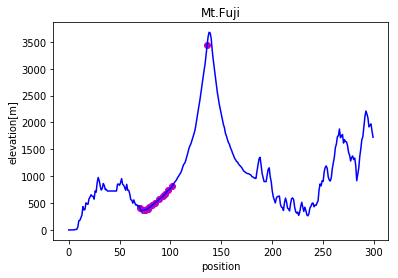

In [62]:
# 標高番号のリストで標高を取り出す
list_next_h = h[list_all[135]]
plt.plot(fuji[:,0],h,color = "b")
# x=今の地点番号 y=今の標高
plt.scatter(list_all[135], list_next_h,color="m")
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()

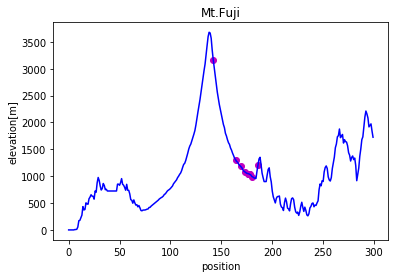

In [63]:
# 標高番号のリストで標高を取り出す
list_next_h = h[list_all[141]]
plt.plot(fuji[:,0],h,color = "b")
# x=今の地点番号 y=今の標高
plt.scatter(list_all[141], list_next_h,color="m")
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()

## 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [64]:
# 141 スタート　アルファ0.3
start = 141
list_nextpoint = [start]
while True:
    list_nextpoint = gezan(start, list_nextpoint, 0.3)
    # すでに通った地点が次の地点番号の場合も無限ループするので下山とみなす
    if list_nextpoint[-1] in list_nextpoint[:-1]:
        print("おめでとうございます！下山完了です")
        break
    else:
        start = list_nextpoint[-1]

今の地点番号：141  今の標高：3348.43  次の地点番号:207.0  次の標高:631.41
今の地点番号：207  今の標高：631.41  次の地点番号:204.0  次の標高:587.23
今の地点番号：204  今の標高：587.23  次の地点番号:179.0  次の標高:1022.1
今の地点番号：179  今の標高：1022.1  次の地点番号:182.0  次の標高:970.58
今の地点番号：182  今の標高：970.58  次の地点番号:187.0  次の標高:1321.2
今の地点番号：187  今の標高：1321.2  次の地点番号:152.0  次の標高:1963.73
今の地点番号：152  今の標高：1963.73  次の地点番号:181.0  次の標高:985.66
今の地点番号：181  今の標高：985.66  次の地点番号:183.0  次の標高:960.52
今の地点番号：183  今の標高：960.52  次の地点番号:186.0  次の標高:1203.92
今の地点番号：186  今の標高：1203.92  次の地点番号:153.0  次の標高:1904.2
今の地点番号：153  今の標高：1904.2  次の地点番号:171.0  次の標高:1124.83
今の地点番号：171  今の標高：1124.83  次の地点番号:182.0  次の標高:970.58
おめでとうございます！下山完了です


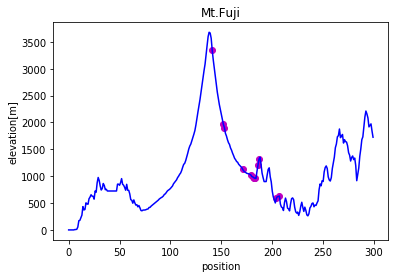

In [65]:
# 141 スタート　アルファ0.3
# 標高番号のリストで標高を取り出す
list_next_h = h[list_nextpoint]
plt.plot(fuji[:,0],h,color = "b")
# x=今の地点番号 y=今の標高
plt.scatter(list_nextpoint, list_next_h,color="m")
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()

In [66]:
# 141 スタート　アルファ0.5
start = 141
list_nextpoint = [start]
while True:
    list_nextpoint = gezan(start, list_nextpoint, 0.5)
    # すでに通った地点が次の地点番号の場合も無限ループするので下山とみなす
    if list_nextpoint[-1] in list_nextpoint[:-1]:
        print("おめでとうございます！下山完了です")
        break
    else:
        start = list_nextpoint[-1]

今の地点番号：141  今の標高：3348.43  次の地点番号:251.0  次の標高:1079.27
今の地点番号：251  今の標高：1079.27  次の地点番号:162.0  次の標高:1384.07
今の地点番号：162  今の標高：1384.07  次の地点番号:184.0  次の標高:958.44
今の地点番号：184  今の標高：958.44  次の地点番号:185.0  次の標高:1094.28
今の地点番号：185  今の標高：1094.28  次の地点番号:117.0  次の標高:1429.75
今の地点番号：117  今の標高：1429.75  次の地点番号:82.0  次の標高:458.66
今の地点番号：82  今の標高：458.66  次の地点番号:74.0  次の標高:371.04
今の地点番号：74  今の標高：371.04  次の地点番号:73.0  次の標高:368.91
今の地点番号：73  今の標高：368.91  次の地点番号:66.0  次の標高:462.33
今の地点番号：66  今の標高：462.33  次の地点番号:86.0  次の標高:519.54
今の地点番号：86  今の標高：519.54  次の地点番号:79.0  次の標高:418.41
今の地点番号：79  今の標高：418.41  次の地点番号:65.0  次の標高:503.02
今の地点番号：65  今の標高：503.02  次の地点番号:93.0  次の標高:631.71
今の地点番号：93  今の標高：631.71  次の地点番号:84.0  次の標高:488.4
今の地点番号：84  今の標高：488.4  次の地点番号:76.0  次の標高:377.62
今の地点番号：76  今の標高：377.62  次の地点番号:73.0  次の標高:368.91
おめでとうございます！下山完了です


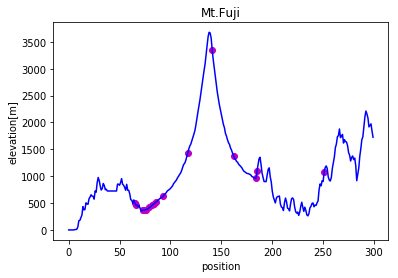

In [67]:
# 141 スタート　アルファ0.5
# 標高番号のリストで標高を取り出す
list_next_h = h[list_nextpoint]
plt.plot(fuji[:,0],h,color = "b")
# x=今の地点番号 y=今の標高
plt.scatter(list_nextpoint, list_next_h,color="m")
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()

In [68]:
# 141 スタート　アルファ0.1
start = 141
list_nextpoint = [start]
while True:
    list_nextpoint = gezan(start, list_nextpoint, 0.1)
    # すでに通った地点が次の地点番号の場合も無限ループするので下山とみなす
    if list_nextpoint[-1] in list_nextpoint[:-1]:
        print("おめでとうございます！下山完了です")
        break
    else:
        start = list_nextpoint[-1]

今の地点番号：141  今の標高：3348.43  次の地点番号:163.0  次の標高:1333.51
今の地点番号：163  今の標高：1333.51  次の地点番号:168.0  次の標高:1201.31
今の地点番号：168  今の標高：1201.31  次の地点番号:170.0  次の標高:1160.85
今の地点番号：170  今の標高：1160.85  次の地点番号:172.0  次の標高:1095.73
今の地点番号：172  今の標高：1095.73  次の地点番号:175.0  次の標高:1053.28
今の地点番号：175  今の標高：1053.28  次の地点番号:176.0  次の標高:1049.33
今の地点番号：176  今の標高：1049.33  次の地点番号:176.0  次の標高:1049.33
おめでとうございます！下山完了です


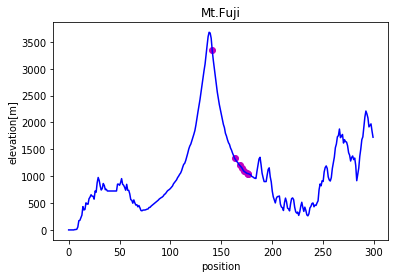

In [69]:
# 141 スタート　アルファ0.1
# 標高番号のリストで標高を取り出す
list_next_h = h[list_nextpoint]
plt.plot(fuji[:,0],h,color = "b")
# x=今の地点番号 y=今の標高
plt.scatter(list_nextpoint, list_next_h,color="m")
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()